# 1. LINEAR REGRESSION 

(contineous Target variable -Charges)

In [1]:
## imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#### Basic Checks
- head tail is null.sum, describe, info etc

In [2]:
d=pd.read_csv('insurance.csv')  #data imported

In [3]:
d # calling the data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
d.head()  #basic checks

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
d.tail() #basic checks

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
d.info()   #basic checks for  null values  -- no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
d.describe() #basic checks for data patterns

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Exploratory Data Analysis -LR

- Univariate analysis (column name(x) vs count(y)
- Bivariate Analysis  (column (x) vs target (y)
- multivariate Analysis  (Pairplot)

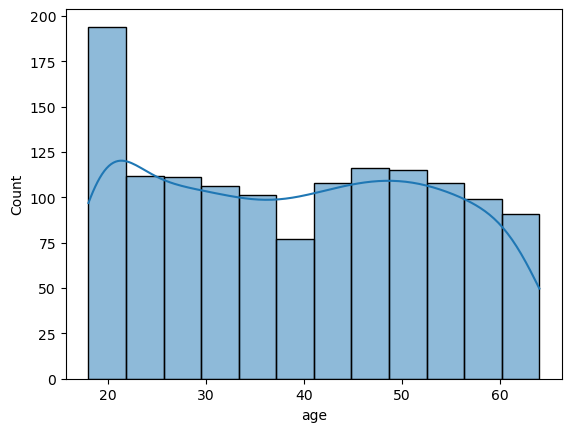

In [8]:
#Univariate Analysis  
#1. age column with displot
#the ages of our sample ranges from 20 to 70 , 20 having the highest count and creating a slight rightward skew

sns.histplot(x=d.age,kde=True)
plt.show()

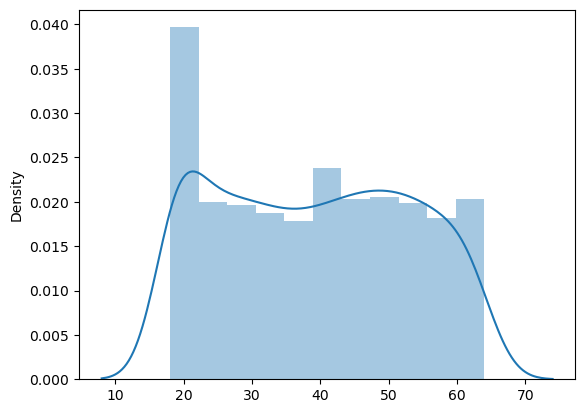

In [9]:
#age with histogram
sns.distplot(x=d.age,kde=True)
plt.show()

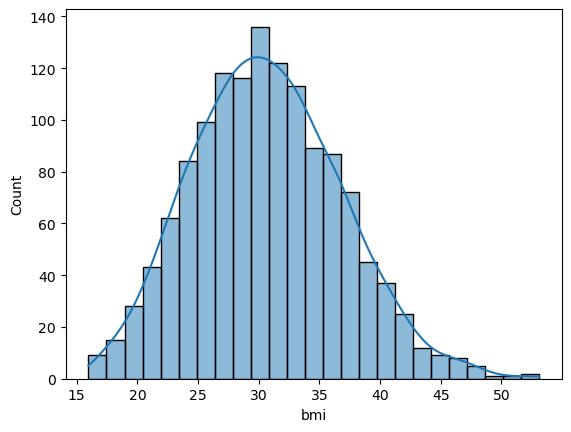

In [10]:
# BMI with hisplot
#the BMI Histogram shows a peak at 30, with the overall range being between 15 and 55, and is an almost perfect bell shaped curve 
#it displays a fairly normal distribution
sns.histplot(x=d.bmi,kde=True)
plt.show()

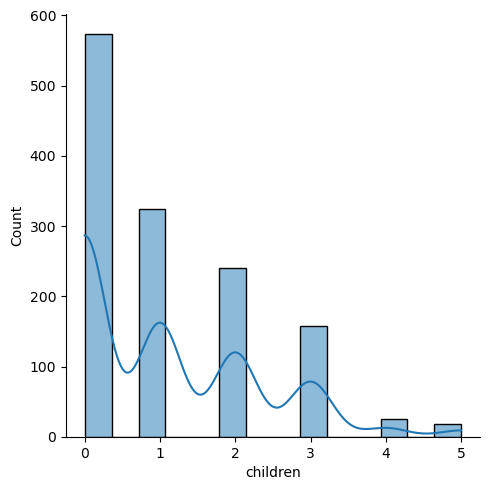

In [11]:
#Analyzing Children

sns.displot(x=d.children,kde=True)
plt.show()

after analizing the column Children, it is seen that most our population sample has no children where as the the least have 4 to 5 children

From the output, you can see that there are 500 male individuals and 498 female individuals in the dataset.

Please note that since "sex" is a categorical feature, the concept of skewness does not apply, and we can analyze the distribution solely based on frequency counts.

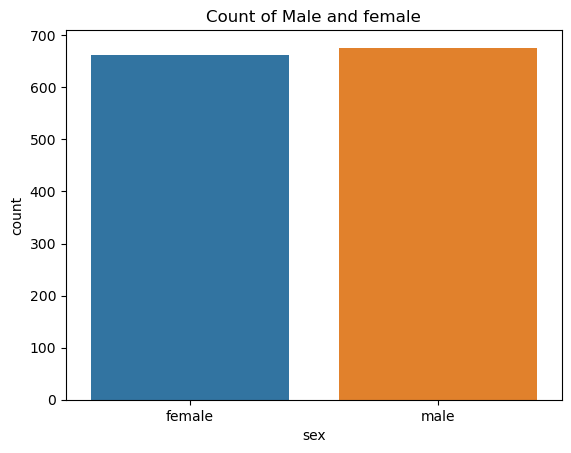

In [12]:

# Create a count plot for the "sex" feature
sns.countplot(x='sex', data=d)
plt.title("Count of Male and female")
plt.show()

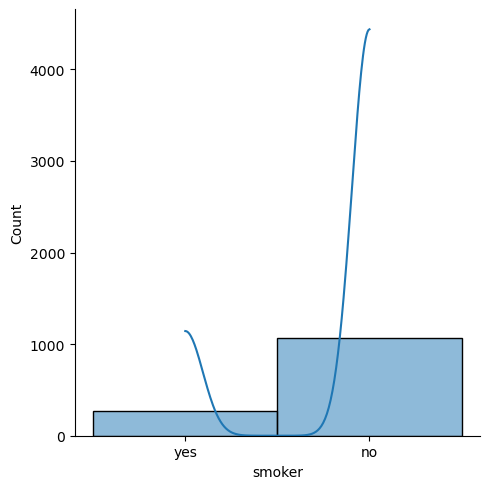

In [13]:
#Analyzing smoker
sns.displot(x=d.smoker,kde=True)
plt.show()

In [14]:
#non-smokers in our sample are higher than smokers by a high margin
# Calculate the frequency count of each category in the "children" feature

smoker_counts = d['smoker'].value_counts()
print("Frequency count of each category in the 'smoker' feature:\n", smoker_counts)

#number of smokers 274 and non smokers is 1063

Frequency count of each category in the 'smoker' feature:
 no     1064
yes     274
Name: smoker, dtype: int64


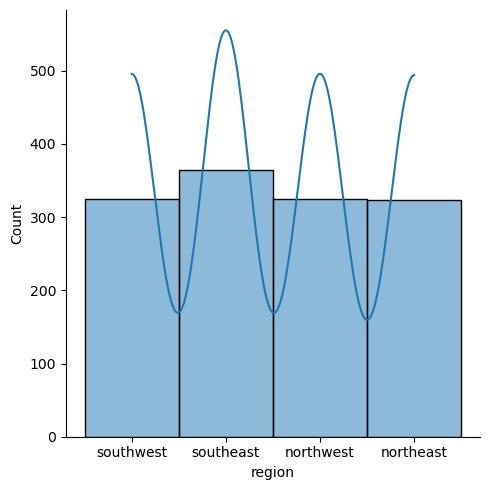

In [15]:
#Analyzing Region
#the unique values in region include, south east, south west, northeast and north west
#of all the four regions the southeast region has slightly highgher count

sns.displot(x=d.region,kde=True)
plt.show()

In [16]:
# Load the dataset, import pandas
# Calculate the frequency count of each category in the "sex" feature

region_counts = d['region'].value_counts()

print("Frequency count of each category in the 'region' feature:\n", region_counts)

#Analyzing Region
#the unique values in region include, south east, south west, northeast and north west
#of all the four regions the southeast region has slightly highgher count
#The distribution of individuals across regions gives an idea of the geographic spread of the insured population
#The high count in the "southeast" region  indicates that more individuals from this region have participated in the insurance program.
# The "southeast" region has the highest number of individuals (364), while the other three regions, "northwest," "southwest," and "northeast," have a similar count (around 324-325 each).

Frequency count of each category in the 'region' feature:
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


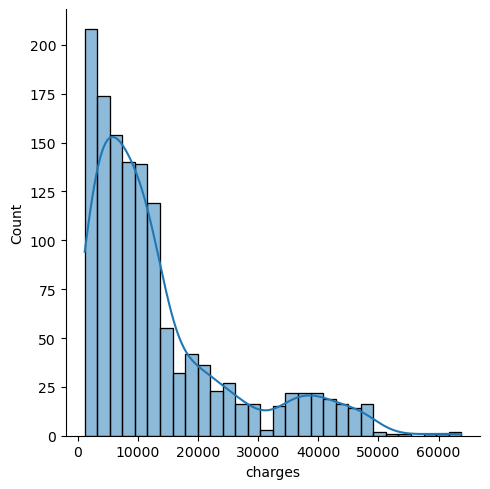

In [17]:
#Analyzing charges  (target variable)
sns.displot(x=d.charges,kde=True)
plt.show()

In [18]:
# Calculate the skewness of the "bmi" feature for more insights
bmi_skewness = d['bmi'].skew()
print("Skewness of BMI feature:", bmi_skewness)
#the dist plot graph displays that most of the policy holders 
#In this case, the right-skewed distribution suggests that most individuals have relatively lower charges, while a smaller proportion of individuals may have significantly higher charges.

Skewness of BMI feature: 0.2840471105987448


#### Bivariate Analysis -LR

In [19]:
d.head() #calling data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


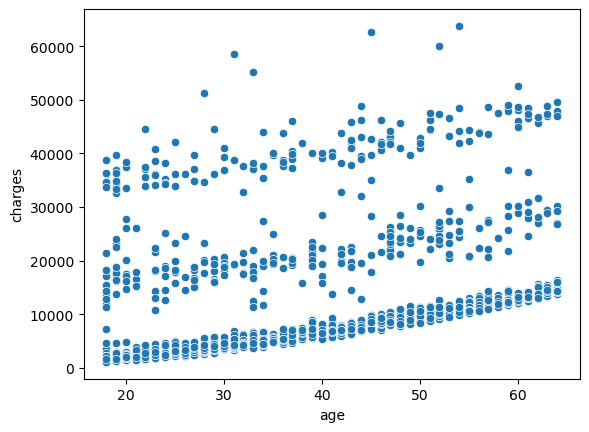

In [20]:
#age and charges
sns.scatterplot(x='age',y='charges',data=d)
plt.show()

#the scatter plot for the column age shows that the charges increase as an individuals are goes up

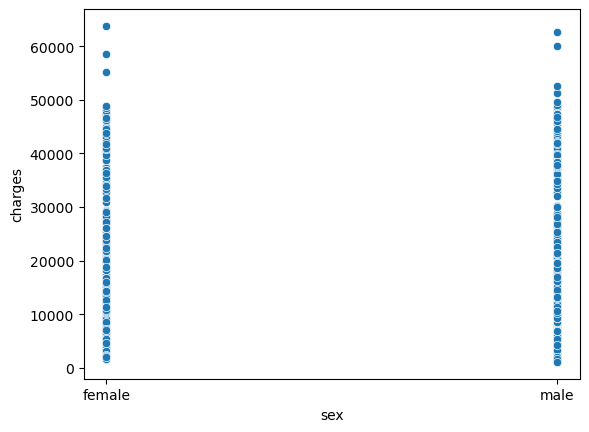

In [21]:
#gender and charges
sns.scatterplot(x='sex',y='charges',data=d)
plt.show()

#the max charge for the male gender is higher than that of female

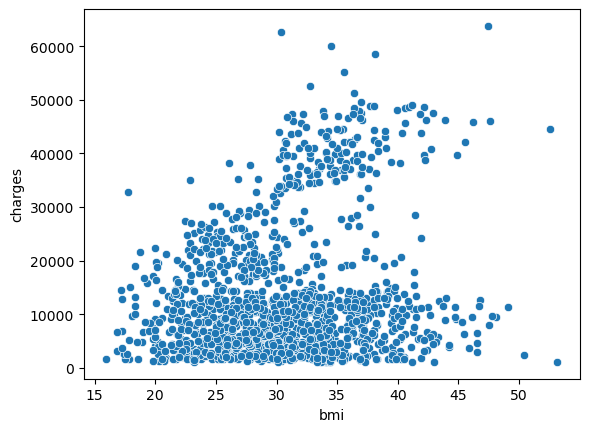

In [22]:
#bmi and charges
sns.scatterplot(x='bmi',y='charges',data=d)
plt.show()

#those with a BMI of 30 to 40 (median), may seem to be paying a higher charge than the rest

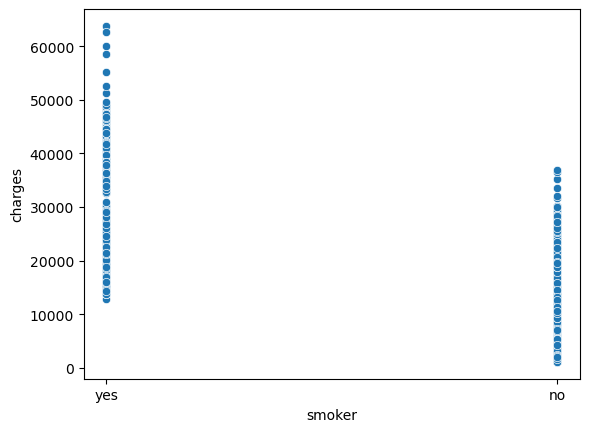

In [23]:
#smoker and charges
sns.scatterplot(x='smoker',y='charges',data=d)
plt.show()

#there is a visible difference seen in the premium charged for smokers v/s non smokers, this could a result of smokers to be at a higher health risk, and hence being charged more

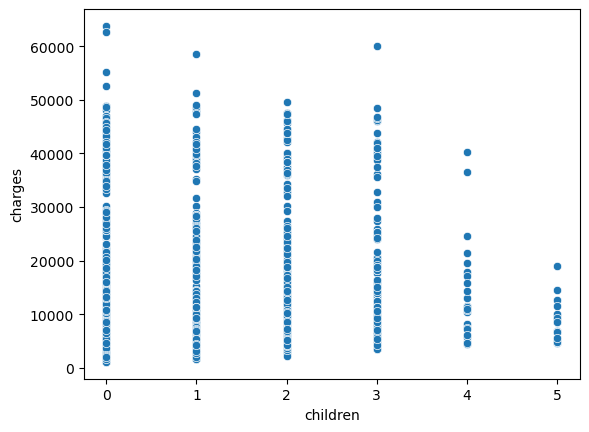

In [24]:
#children and charges
sns.scatterplot(x='children',y='charges',data=d)
plt.show()

#from the scatter plot it is seen that the individuals with a larger number of children are charged less v/s those with no or children

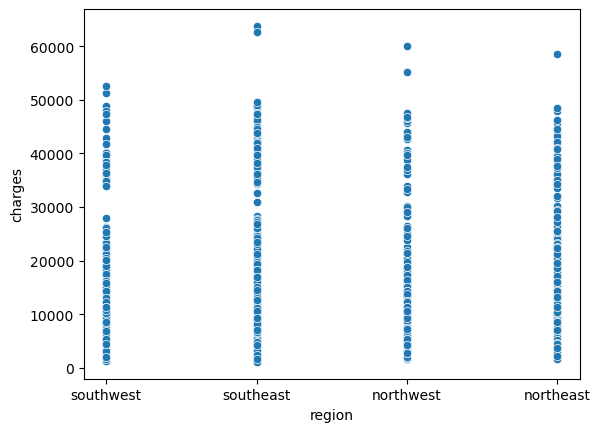

In [25]:
#region and charges
sns.scatterplot(x='region',y='charges',data=d)
plt.show()

#the scatter plot for all 4 region4 show a similar pattern, with the southeast followed by northwest and north east having a few outliers paying a higher charge.  

#### Multivariate Analysis

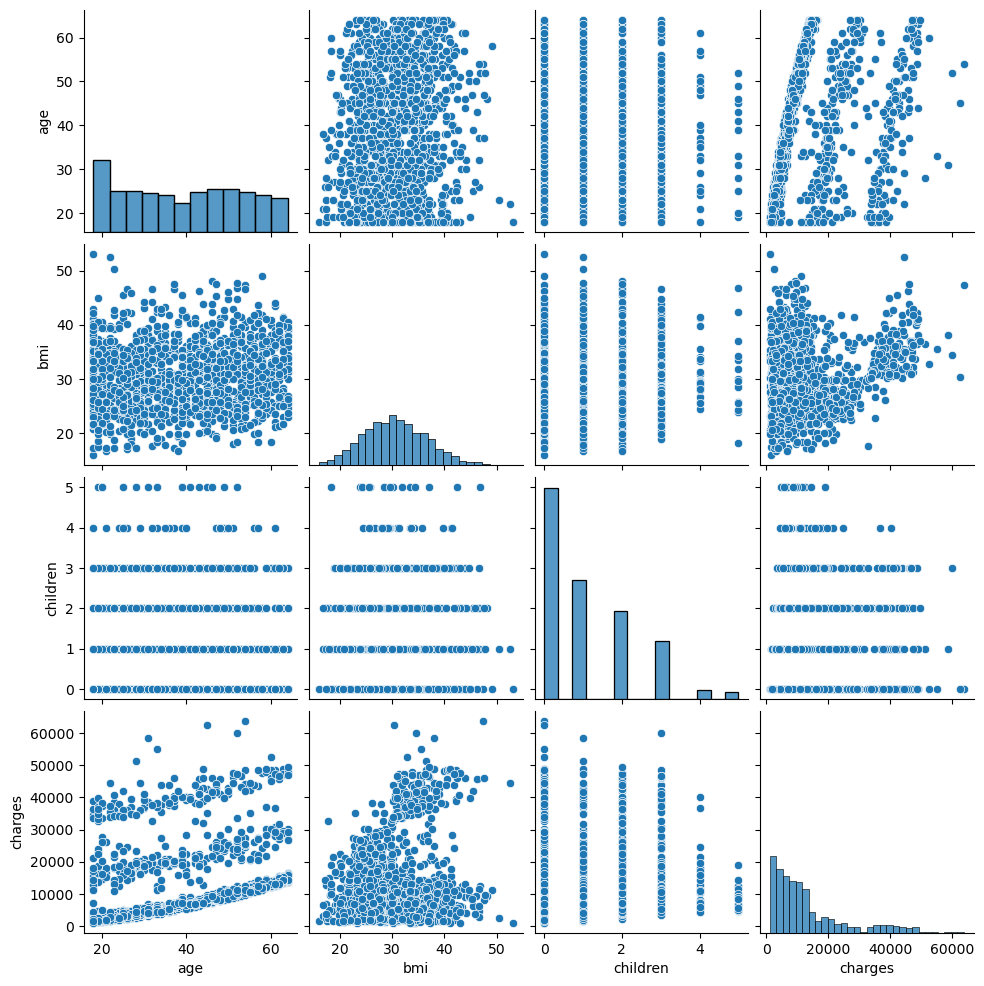

In [26]:
## Step 3 Multivariate Analysizing
sns.pairplot(data=d)
plt.show()

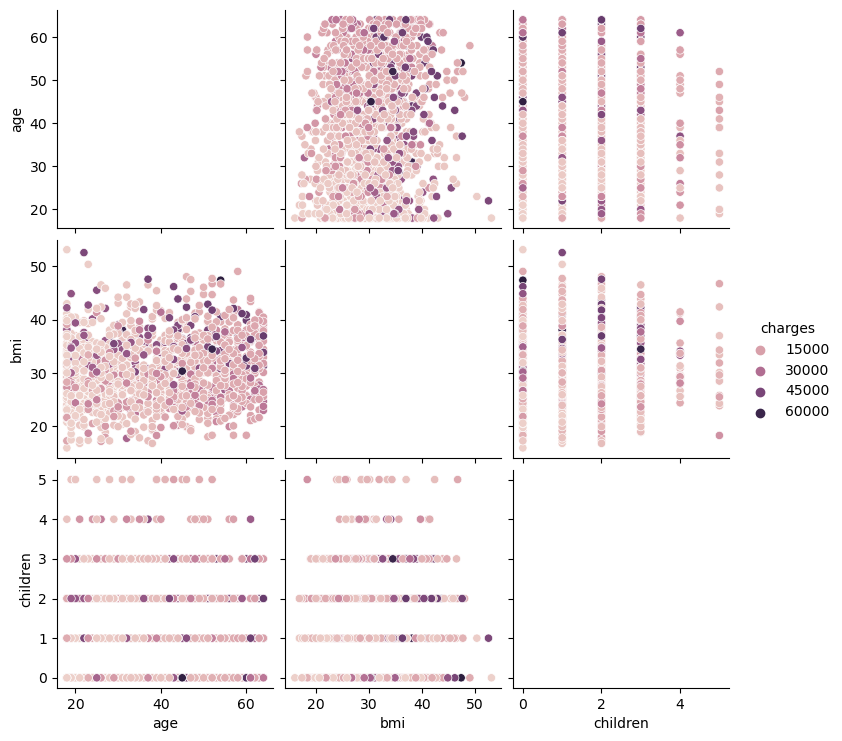

In [27]:
## Step 3 Multivariate Analysizing
sns.pairplot(d, hue='charges')
plt.show()

#A strong positive correlation between 'charges' and another variable would mean as a positively sloped scatter plot, while a strong negative correlation would be represented by a negatively sloped scatter plot.
#also a strong correlation between independant variables wold not be prefered as it would suggest that they are dependent on eachother

#### DATA PREPROCESSING AND FEATURE ENGINEERING- LR

In [28]:
#1. checking for null entries, as null entries would interrupt evaluations.
d.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##### 2. CATEGORICAL DATA TO DESCRETE
###### For smoker (yes, no) and sex (male, female) > 0,1
- one hot encoding (mainly for unordered data ex: apple, orange etc)
- LabelEncoder (mainly for Orderd data/hierarcy  ex: 0,1,2  / good, better, best / )

In [29]:
#converting sex from categorical to descrete
#since the column sex contain strings, we need to convert then to numeric(categorical) values, for further evaluations.
d.sex=pd.get_dummies(d.sex,drop_first=True)
d.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [30]:
#converting smoker from categorical to descrete
##since the column smoker contain strings, we need to convert then to numeric(categorical) values, for further evaluations.

d.smoker=pd.get_dummies(d.smoker,drop_first=True)
d.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [31]:
#Converting categorical data to DESCRETE (0,1) USING ONE HOT ENCODING - FOR ORDERED DATA

from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

In [32]:
d.region=lc.fit_transform(d.region)

In [33]:
print(d['region'].unique())    #Used labelencoding

[3 2 1 0]


In [34]:
print(d['smoker'].unique())     #used one hor encoding - get dummies

[1 0]


In [35]:
print(d['sex'].unique())

[0 1]


##### CHECKING FOR OUTLIERS

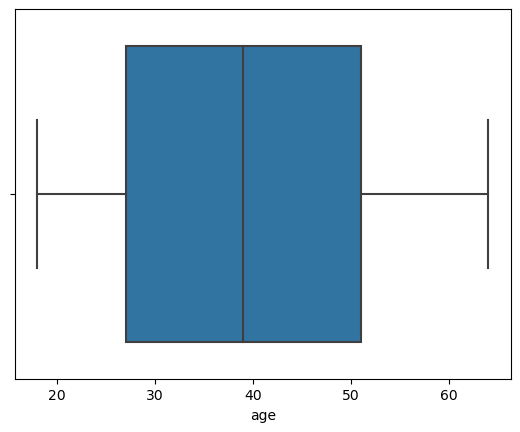

In [36]:
# Step 3 Checking the outlier
# age > no outliers
sns.boxplot(x='age',data=d)
plt.show()

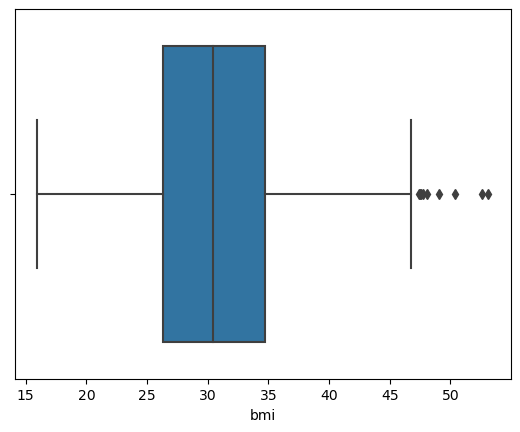

In [37]:
# Step 3 Checking the outlier
# bmi > the boxplot in bmi shows multiple outliers, since they are more in number, we treat them as a part of our data set

sns.boxplot(x='bmi',data=d)
plt.show()

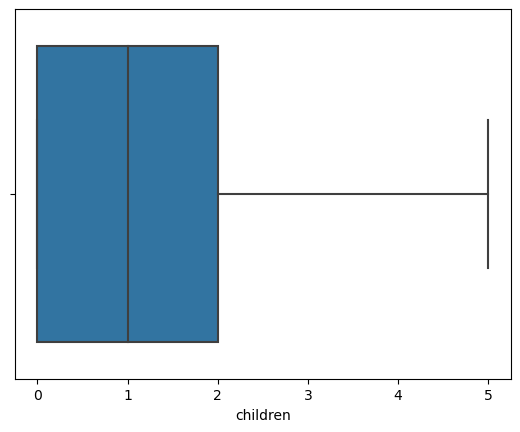

In [38]:
# Step 3 Checking the outlier
# children > it is seen that,majority of the data falls between 0 and 2 signifying most insurance holders have 0 -2 children, wheres only a few exceed this range 
sns.boxplot(x='children',data=d)
plt.show()

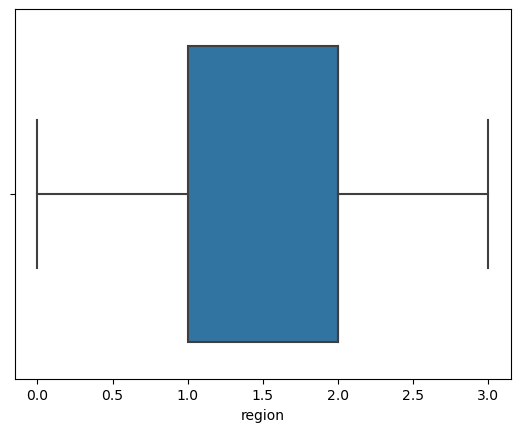

In [39]:
# Step 3 Checking the outlier
# region > boxplot shows almost equal concentration of data
sns.boxplot(x='region',data=d)
plt.show()

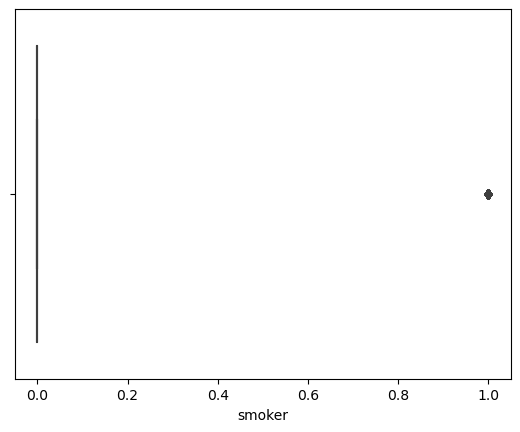

In [40]:
# Step 3 Checking the outlier
# age > The single horizontal line inside the box represents median age of the policyholders, and the dot an outlier.
sns.boxplot(x='smoker',data=d)
plt.show()

In [41]:
# converting contineous to descrete data  using minmax scalar  (AGE, BMI)
# NOT REQUIRED DATA WITHIN RANGE 
#from sklearn.preprocessing import MinMaxScaler
#scale=MinMaxScaler()

# CORRELATION CHECK 
- Using d.corr
- sns.heatmap
done to check the correlation between independant variables , if more than 0.5 the column had to be dropped

In [42]:
#correlation check
d.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


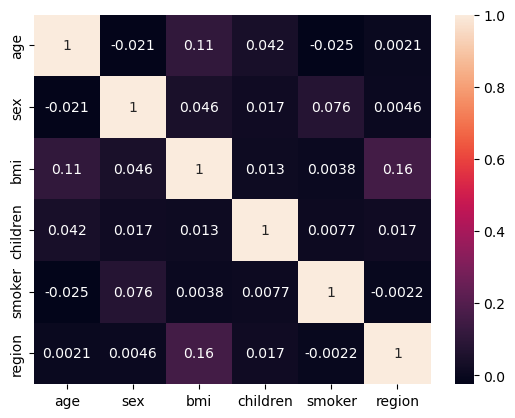

In [43]:
sns.heatmap(d.drop('charges',axis=1).corr(),annot=True)
plt.show()

#a strong correlation between independant variables wold not be prefered as it would suggest that they are dependent on eachother

##### Checking for duplicates, and drop if appears

In [44]:
d.duplicated().sum()  #dropping duplicates to avoid repetation of calculations by the models 

1

In [45]:
#4. checking for duplicate values 
display(d.drop_duplicates(inplace=True))

# Print 

None

In [46]:
d # 1337 from 1338 rows 1 dropped

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


## MODEL CREATION - SPLITTING THE DATA

In [47]:
# 5. Creating independent and dependent variable

X0=d[['age','sex','bmi','children','smoker','region']] #specified each independant variable
# OR   X = d.drop('charges', axis=1)#independent variable 

y0= d.charges #dependent variable 

In [48]:
## scaling the data using - StandardDcaler

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

X0_scaled = scaler.fit_transform(X0)
X0_scaled  #checking x_scaled output

#Y NOT REQ TO BE SCALED

array([[-1.44041773, -1.00977099, -0.45315959, -0.90923416,  1.96966039,
         1.34316271],
       [-1.51164747,  0.99032355,  0.50942165, -0.07944162, -0.50770174,
         0.43801727],
       [-0.79935006,  0.99032355,  0.3831546 ,  1.58014347, -0.50770174,
         0.43801727],
       ...,
       [-1.51164747, -1.00977099,  1.01448983, -0.90923416, -0.50770174,
         0.43801727],
       [-1.29795825, -1.00977099, -0.79752426, -0.90923416, -0.50770174,
         1.34316271],
       [ 1.55123139, -1.00977099, -0.26129928, -0.90923416,  1.96966039,
        -0.46712816]])

In [49]:
#checking the variable shape 

print(y0.shape)
print(X0.shape)

(1337,)
(1337, 6)


In [50]:
#Traning and testing data creation
from sklearn.model_selection import train_test_split

#use this if you have a specific y test range  > test size
#X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=4)


X0_train,X0_test,y0_train,y0_test=train_test_split(X0_scaled,y0,random_state=4)    #imp

In [51]:
d.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [52]:
y0_train

315      9722.76950
597      5594.84550
612      2207.69745
462     15230.32405
399      1631.66830
           ...     
360     10043.24900
710      1727.54000
439      2897.32350
174      2855.43755
1147     2261.56880
Name: charges, Length: 1002, dtype: float64

In [53]:
# Step 3 Creating model

from sklearn.linear_model import LinearRegression #import for linear regression

LR=LinearRegression() # object creation
LR.fit(X0_train,y0_train) # training of linear regression

y0_predict=LR.predict(X0_test)

In [54]:
y0_test # Actual values

727    16657.71745
260    11837.16000
903     8125.78450
566     6373.55735
777     7448.40395
          ...     
804     1815.87590
575    12222.89830
258    11520.09985
489    10461.97940
288    47896.79135
Name: charges, Length: 335, dtype: float64

In [55]:
y0_predict # Values predicted by model

array([27238.89442377, 10862.62755219, 12405.41652243, 11729.60376128,
       13014.23879874,  1944.30739873, 15547.66592736, 32359.48291751,
       36551.59830251,  1968.9686419 , 10411.73845073, 34037.76078767,
       26493.58701748, 13997.11200941, 17253.3655262 , 40839.75825932,
       11682.09985773, 15759.80130421, 38833.54707102,  2619.11442919,
        2890.34495293, 15135.19318863,  8692.27187626,  3699.33340914,
        8936.67358951, 32227.44260323, 37650.04942021,  9044.89465847,
       32197.28139385, 10211.56441087,   107.14743562,  1719.15676969,
       13799.68322637,  4077.74997817,  9462.74268778,  1445.97888958,
       15775.82856392, 15560.2764371 ,  5197.90192207,  -458.37528129,
       13998.4611438 , 11055.54855462,  7009.08349053, 30993.43675409,
        9369.51955345, 11947.33172074, 33936.12018972,  6055.15740911,
       13971.73555188, 13814.19897854,  6782.84401503,  4038.59511716,
       25864.29055791,  5911.0606093 ,  2611.46850538, 11770.16758852,
      

## MODEL EVALUATION TOOLS

In [56]:
# Step 4 Model Evalution for REGRESSION 

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

#r2
#adjusted r2
#mean sq error
#mean absolute error

In [57]:
r2score_lr1=r2_score(y0_test,y0_predict)
r2score_lr1

0.7591293630499649

In [58]:
X0_test.shape

(335, 6)

In [59]:
adjusted_r2_lr1=1-(1-0.72)*(268-1)/(268-6-1)
adjusted_r2_lr1

0.7135632183908045

In [60]:
import math
mse_lr1=(mean_squared_error(y0_test,y0_predict))
mmse_lr1=(math.sqrt(mean_squared_error(y0_test,y0_predict))) # root mean squared error
mae_lr1=(mean_absolute_error(y0_test,y0_predict))

In [61]:
print(mse_lr1)
print(mmse_lr1)
print(mae_lr1)

34658327.33236108
5887.132352203497
4078.132244177235


# 2. K-NEAREST NEIGHBOUR (KNN)

In [62]:

# 1. imports

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor #only for regression 
#from sklearn.neighbors import KNeighborsClassifier (only for classification)
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [63]:
d

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


#3.get details of the data using 
- .head
- .tail
- .describe
- .isnull().sum()
- to check for zeros data[(data==0)] 
- to check unique .data[''].unique()

#4. Converting Categorical to Numerical 
we use;
- one hot encoding  (unordered data)
- label encoding   (ordered data)

In [64]:
#done
#categorical to numerical (LABEL ENCODING)
#from sklearn.preprocessing import LabelEncoder
#lc=LabelEncoder()
#d.region=lc.fit_transform(d.region)

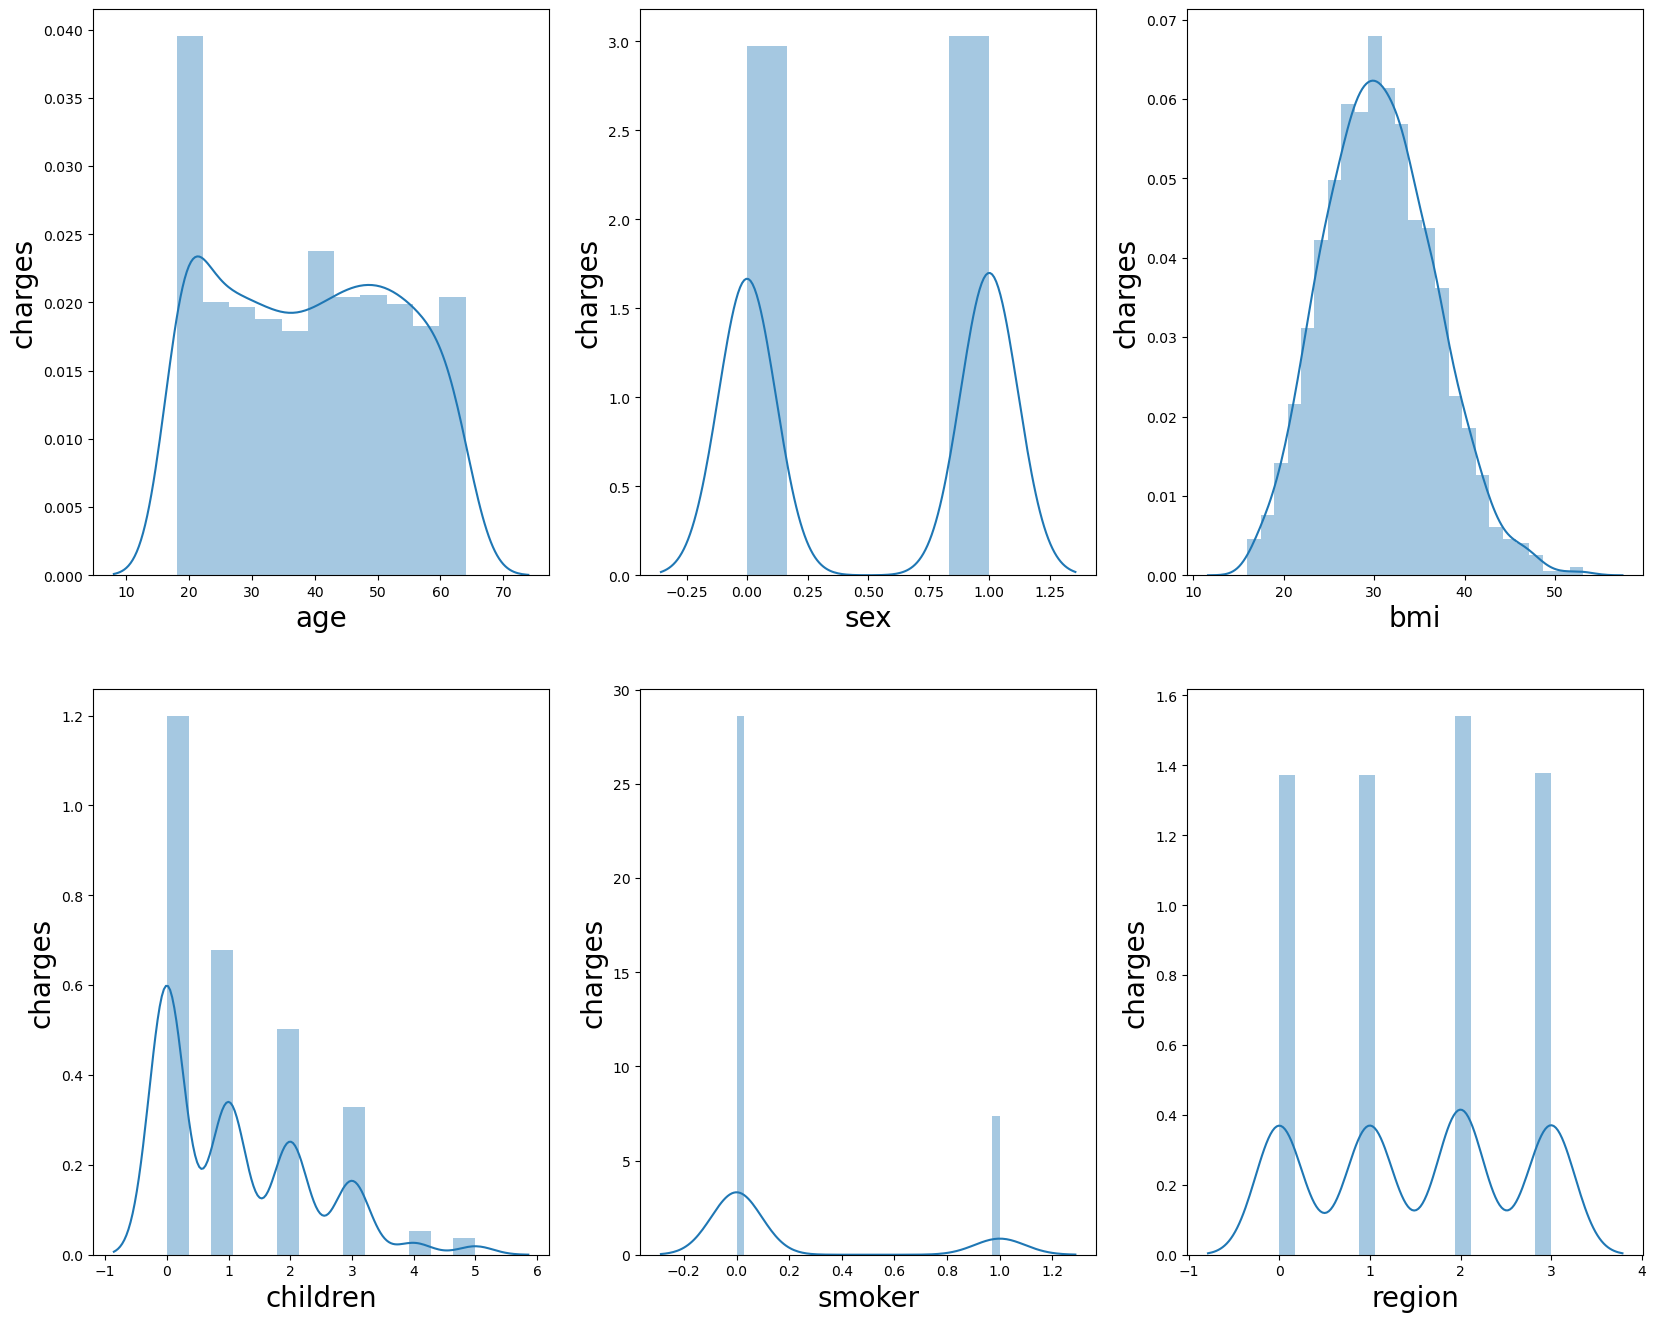

In [65]:
# Data distribution for every column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in d:
    if plotnumber<=6 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(d[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('charges',fontsize=20)
    plotnumber+=1
plt.show()


In [66]:
## scaling the data
#from sklearn.preprocessing import StandardScaler 
#scalar = StandardScaler()
#X_scaled = scalar.fit_transform(X)

In [67]:
# y data is contineous

In [68]:
## Creating independent and dependent variable
X=d.drop('charges',axis=1)
#independent variable 
y=d.charges
#target
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [69]:
## scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [70]:
print(X_scaled.shape)
print(y.shape)

(1337, 6)
(1337,)


In [71]:
X_scaled

array([[-1.44041773, -1.00977099, -0.45315959, -0.90923416,  1.96966039,
         1.34316271],
       [-1.51164747,  0.99032355,  0.50942165, -0.07944162, -0.50770174,
         0.43801727],
       [-0.79935006,  0.99032355,  0.3831546 ,  1.58014347, -0.50770174,
         0.43801727],
       ...,
       [-1.51164747, -1.00977099,  1.01448983, -0.90923416, -0.50770174,
         0.43801727],
       [-1.29795825, -1.00977099, -0.79752426, -0.90923416, -0.50770174,
         1.34316271],
       [ 1.55123139, -1.00977099, -0.26129928, -0.90923416,  1.96966039,
        -0.46712816]])

In [72]:
## splitting the training and testing data
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=42)

In [73]:
X_train   #check done

array([[-0.8705798 ,  0.99032355, -0.75980813, -0.90923416, -0.50770174,
        -1.37227359],
       [ 1.69369087,  0.99032355,  0.4913835 ,  1.58014347, -0.50770174,
         0.43801727],
       [ 0.48278527, -1.00977099, -0.28917642,  0.75035092, -0.50770174,
         1.34316271],
       ...,
       [-1.36918799,  0.99032355, -1.42066033, -0.07944162, -0.50770174,
         1.34316271],
       [-0.08705265, -1.00977099, -0.43676128,  1.58014347, -0.50770174,
         1.34316271],
       [-0.30074188, -1.00977099,  0.85214648,  0.75035092, -0.50770174,
         0.43801727]])

In [74]:
X_test

array([[ 0.6964745 ,  0.99032355, -1.33620899, -0.90923416, -0.50770174,
        -1.37227359],
       [-0.72812032, -1.00977099, -0.8303209 ,  2.40993601, -0.50770174,
         1.34316271],
       [ 0.83893398, -1.00977099,  0.93823765,  1.58014347, -0.50770174,
        -0.46712816],
       ...,
       [ 0.41155553,  0.99032355, -1.69123257,  1.58014347, -0.50770174,
         0.43801727],
       [-0.72812032,  0.99032355, -1.33620899,  1.58014347, -0.50770174,
        -1.37227359],
       [ 1.33754216, -1.00977099,  0.28394478, -0.07944162, -0.50770174,
        -1.37227359]])

In [75]:
X_scaled

array([[-1.44041773, -1.00977099, -0.45315959, -0.90923416,  1.96966039,
         1.34316271],
       [-1.51164747,  0.99032355,  0.50942165, -0.07944162, -0.50770174,
         0.43801727],
       [-0.79935006,  0.99032355,  0.3831546 ,  1.58014347, -0.50770174,
         0.43801727],
       ...,
       [-1.51164747, -1.00977099,  1.01448983, -0.90923416, -0.50770174,
         0.43801727],
       [-1.29795825, -1.00977099, -0.79752426, -0.90923416, -0.50770174,
         1.34316271],
       [ 1.55123139, -1.00977099, -0.26129928, -0.90923416,  1.96966039,
        -0.46712816]])

In [78]:
## Error calculation for regression task
# Donot run this code on current dataset
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

rmse_val = [] #create list to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 6490.4058819402735
RMSE value for k=  2 is: 5663.969925698313
RMSE value for k=  3 is: 5311.663781892014
RMSE value for k=  4 is: 5076.761641682984
RMSE value for k=  5 is: 5077.966191448185
RMSE value for k=  6 is: 5049.980771533616
RMSE value for k=  7 is: 4982.493875433737
RMSE value for k=  8 is: 5069.549489036762
RMSE value for k=  9 is: 5150.77491137076
RMSE value for k=  10 is: 5203.209025309039
RMSE value for k=  11 is: 5237.814539520637
RMSE value for k=  12 is: 5255.694110857463
RMSE value for k=  13 is: 5229.4023201435175
RMSE value for k=  14 is: 5225.717025403052
RMSE value for k=  15 is: 5310.3929805005255
RMSE value for k=  16 is: 5374.064239027843
RMSE value for k=  17 is: 5364.12551003611
RMSE value for k=  18 is: 5371.878575284101
RMSE value for k=  19 is: 5417.282596431817
RMSE value for k=  20 is: 5387.736274610373


In [79]:
rmse_val

[6490.4058819402735,
 5663.969925698313,
 5311.663781892014,
 5076.761641682984,
 5077.966191448185,
 5049.980771533616,
 4982.493875433737,
 5069.549489036762,
 5150.77491137076,
 5203.209025309039,
 5237.814539520637,
 5255.694110857463,
 5229.4023201435175,
 5225.717025403052,
 5310.3929805005255,
 5374.064239027843,
 5364.12551003611,
 5371.878575284101,
 5417.282596431817,
 5387.736274610373]

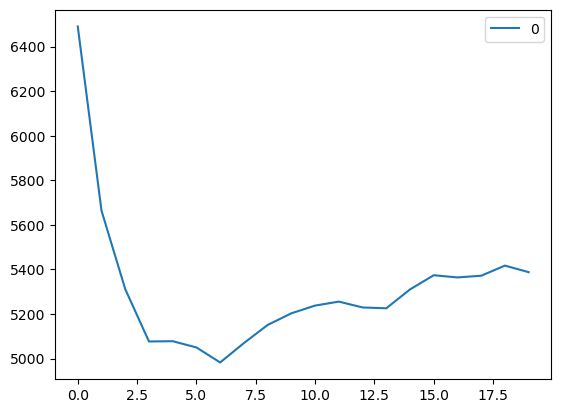

In [80]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()
plt.show()

In [81]:
# let's fit the data into KNN model and see how well it performs:
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train,y_train)
# Predict 
y_predict = knn.predict(X_test)

#### MODEL EVALUATION

In [82]:
#Model Evalution
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score_knn1=r2_score(y_test,y_predict)
r2score_knn1

0.8509424765294422

In [83]:
## calculation of adjusted r2 score
adjusted_r2_knn1 = 1-(1-0.85)*(335-1)/(335-6-1)
adjusted_r2_knn1

0.8472560975609755

In [84]:
import math
mse_knn1=(mean_squared_error(y_test,y_predict))
mmse_knn1=(math.sqrt(mean_squared_error(y_test,y_predict))) # root mean squared error
mae_knn1=(mean_absolute_error(y_test,y_predict))

In [85]:
print(mse_knn1)
print(mmse_knn1)
print(mae_knn1)

25773508.766463708
5076.761641682984
3096.3678422208955


# 3 DECISION TREE & RANDOM FOREST

In [86]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# Univariate analysis

In [88]:
d

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


##### EXPLORATORY DATA ANALYSIS

In [89]:
!pip install sweetviz  

In [90]:
import sweetviz as sv#importing sweetviz library 
my_report = sv.analyze(d)#syntax to use sweetviz
my_report.show_html()#Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### insights from univariate analysis


* The age of Policy holders age lie between 20 - 63.
* The male Population is higher than female population with 1% .
* The median BMI for insurance policy holders lies at 30.4 .
* More than 40% people do not have children. and less that 5% people have more than 3 childrens.
* almost 80%  policy holders are non smokers and 20% are smokers.
* Policy holders from the southeast region are slightly higher in number.
*The Minimum value charge of policy  is 1122 And the number of policy holders paying mininumare about 40 %
* The Maximum value Charged is 63770 and the number of policy holders in this range is less than 1%

#### Bivariate Analysis

In [91]:
# checking the relatonship of all variables with respect to the target variable 

In [92]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   uint8  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   uint8  
 5   region    1337 non-null   int32  
 6   charges   1337 non-null   float64
dtypes: float64(2), int32(1), int64(2), uint8(2)
memory usage: 60.1 KB


In [93]:
## Create a new dataframe with categorical variables only(Check the datatype by using info function)
d_cat=d[['sex','region','smoker']]
d_cat

,sex,region,smoker
0,0,3,1
1,1,2,0
2,1,2,0
3,1,1,0
4,1,1,0
...,...,...,...
1333,1,1,0
1334,0,0,0
1335,0,2,0
1336,0,3,0


In [94]:
categorical_col = []#list
for column in d.columns:  #for loop to acess columns form dataset
    if d[column].dtype == object and len(d1[column].unique()) <= 50:#checking datatype whether datatype is object/string and number of unique label in the columns less than 50 
        categorical_col.append(column)#appending those columns in the list who statisfy the condition 
        print(f"{column} : {d[column].unique()}")#output
        print("====================================")

In [95]:
d_cat #new data frame with categorical columns only

,sex,region,smoker
0,0,3,1
1,1,2,0
2,1,2,0
3,1,1,0
4,1,1,0
...,...,...,...
1333,1,1,0
1334,0,0,0
1335,0,2,0
1336,0,3,0


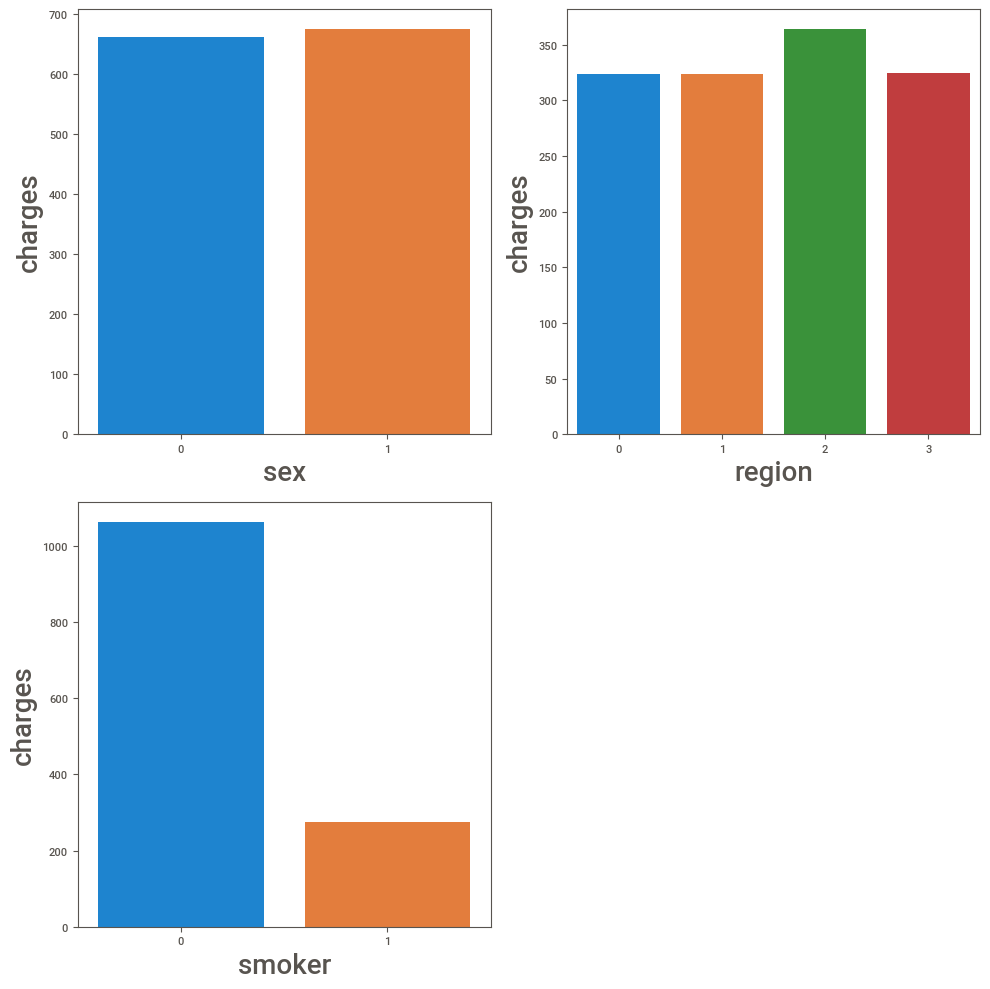

In [96]:
# Plotting how every categorical feature correlate with the "target"
plt.figure(figsize=(10,10), facecolor='white')#canvas size
plotnumber = 1 #count variable

for column in d_cat:
    if plotnumber<=6 :
        ax = plt.subplot(2,2,plotnumber)
        sns.countplot(x=d_cat[column].dropna(axis=0))
        plt.xlabel(column,fontsize=20)
        plt.ylabel('charges',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

* Male policy holders are charged slighlty higher than female policy holders
* The graph shows that the charges accumulated from non smokers is higher (this is probably beacuse the non-smoker population in the data is higher)
* The accumulation of charges for the south east region is higher.



#### bivariate analysis of descrete features

In [97]:
d_num=d[["age","children"]]#numerical columns
d_num

,age,children
0,19,0
1,18,1
2,28,3
3,33,0
4,32,0
...,...,...
1333,50,3
1334,18,0
1335,18,0
1336,21,0


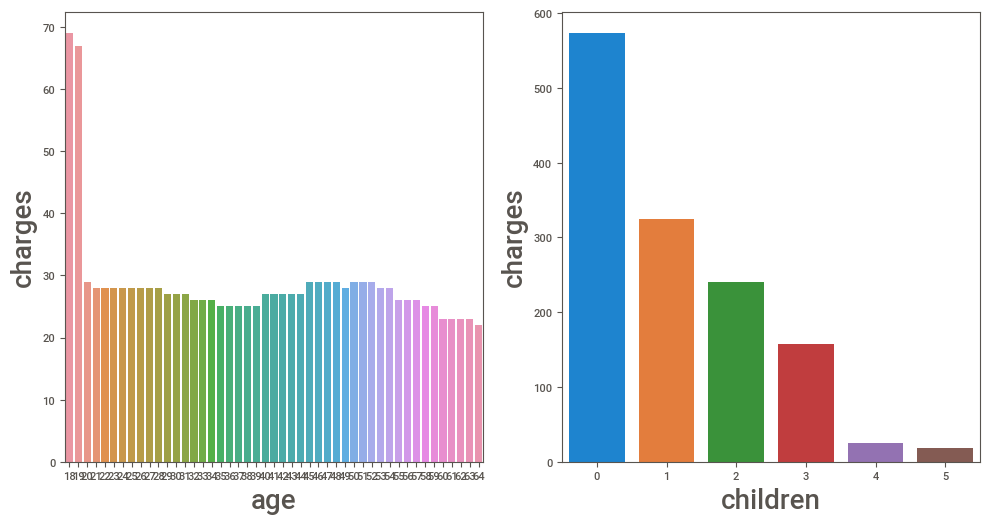

In [98]:
# Plotting how every  discrete feature correlate with the "target"
plt.figure(figsize=(10,10), facecolor='white')#canvas size
plotnumber = 1 #count variable

for column in d_num:
    if plotnumber<=6 :
        ax = plt.subplot(2,2,plotnumber)
        sns.countplot(x=d_num[column].dropna(axis=0))
        plt.xlabel(column,fontsize=20)
        plt.ylabel('charges',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

* Younger policy holders are charged higher rates as compared to the older populaion.
* People with no children are charged higher than people with more number of children(The graph is a descinding graph)

In [99]:
d_cn=d[["bmi"]]#contineous Numerical columns
d_cn

,bmi
0,27.900
1,33.770
2,33.000
3,22.705
4,28.880
...,...
1333,30.970
1334,31.920
1335,36.850
1336,25.800


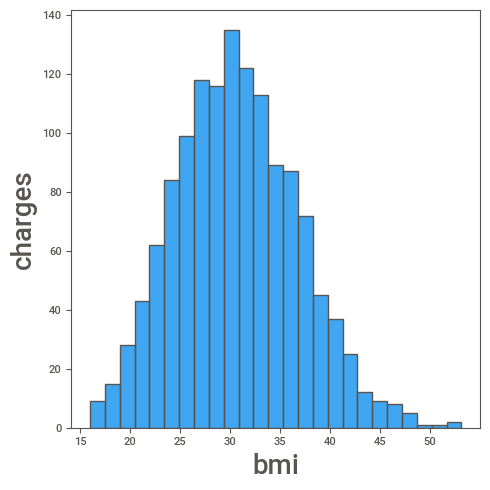

In [100]:
# Plotting how every  contineous feature correlate with the "target"
plt.figure(figsize=(5,5), facecolor='white')#canvas size
plotnumber = 1 #count variable

for column in d_cn:
    if plotnumber<=6 :
        ax = plt.subplot(1,1,plotnumber)
        sns.histplot(x=d_cn[column].dropna(axis=0))
        plt.xlabel(column,fontsize=20)
        plt.ylabel('charges',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

* median bmi pay more than those on either side

*plotting all together 
- categorical
- numerical
- contineous numeric

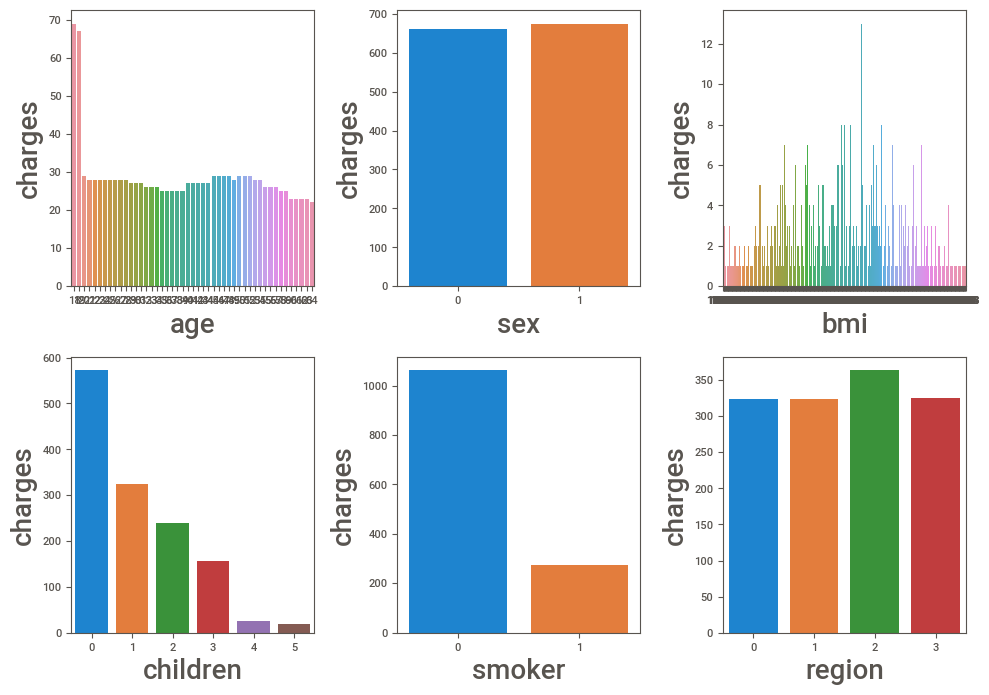

In [101]:
# Plotting every column with the "target"
plt.figure(figsize=(10,10), facecolor='white')#canvas size
plotnumber = 1 #count variable

for column in d:
    if plotnumber<=6 :
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x=d[column].dropna(axis=0))
        plt.xlabel(column,fontsize=20)
        plt.ylabel('charges',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

#Summery
- Age -The age of Policy holders lies between 20 - 63.
- Sex -The male Population is higher than female population by 1% .
- BMI -The median BMI for insurance policy holders lies at 30.4 .
- Children-More than 40% people do not have children and less than 5% people have more than 3 childrens.
- Smoker-Almost 80% policy holders are non smokers and 20% are smokers.
- Region-Policy holders from the southeast region are slightly higher in number.


#### Data pre processing  
- checking for null values   # o null values

In [102]:
d.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [103]:
#conversion of categorical variables  (sex, region, smoker)

Encoding sex manual encoding 
Manual encoding sex feature
d1.sex=d1.sex.map({'female':0,'male':1})
d2.head()

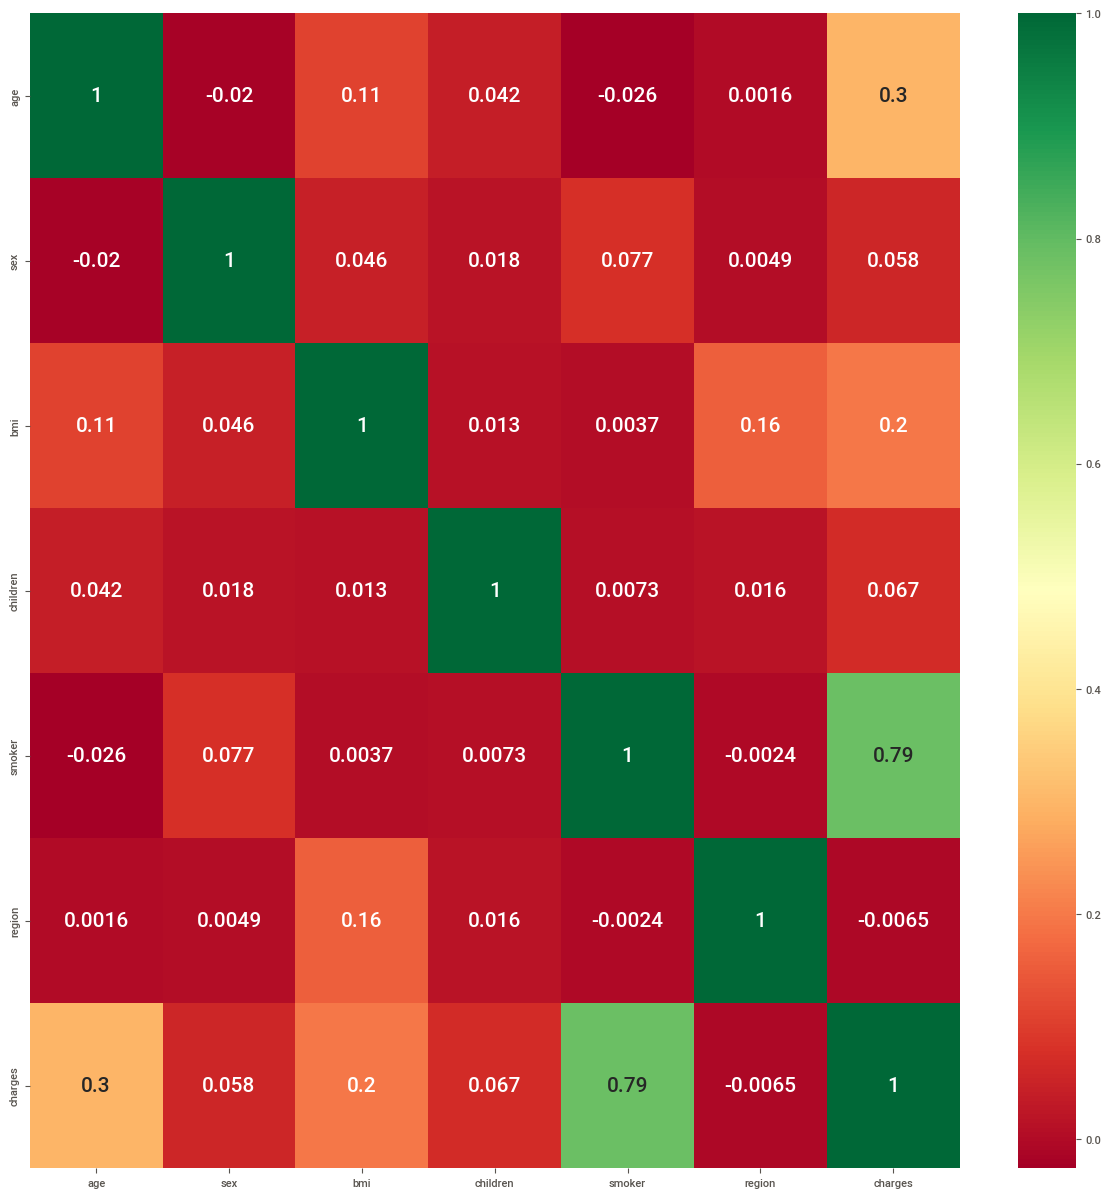

In [104]:
## Checking correlation

plt.figure(figsize=(15, 15))  #canvas size
sns.heatmap(d.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})
plt.show()
# plotting heat map to check correlation

In [105]:
# no strong correlarion so dropong columns not required

#### MODEL CREATION

In [106]:
## Creating independent and dependent variable
X1 = d.drop('charges', axis=1)#independent variable 
y1=d.charges #TARGET dependant variable 

####### Balacing the data     #data balanced so we dont use this 

from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()#object creation

print(Counter(y))# checking count for each class 
X_sm,y_sm=sm.fit_resample(X,y)#applying sampling on target variable 
print(Counter(y_sm))# checking count after sampling for  each class


In [107]:
## preparing training and testing data
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.25, random_state=42)

In [108]:
from sklearn.tree import DecisionTreeRegressor#importing decision tree from sklearn.tree
dt=DecisionTreeRegressor()#object creation for decision tree  
dt.fit(X1_train,y1_train)#training the model
y1_hat=dt.predict(X1_test)#prediction
y1_hat#predicted values 

array([ 9361.3268 ,  4340.4409 , 10848.1343 , 36837.467  , 18963.17192,
        8978.1851 , 36219.40545,  2154.361  ,  7727.2532 ,  9620.3307 ,
       13616.3586 , 23065.4207 , 37079.372  , 13470.86   ,  5989.52365,
        8520.026  ,  1964.78   , 37742.5757 ,  3847.674  ,  3577.999  ,
        1136.3994 , 22462.04375,  8978.1851 , 19719.6947 , 58571.07448,
       26018.95052, 40419.0191 , 43813.8661 ,  9910.35985, 28468.91901,
        4544.2348 ,  9630.397  ,  1720.3537 , 12913.9924 , 48675.5177 ,
        9880.068  ,  2801.2588 ,  4906.40965, 22412.6485 ,  8240.5896 ,
        2217.46915, 19964.7463 , 40273.6455 ,  9290.1395 ,  8515.7587 ,
        2974.126  ,  2217.46915,  7727.2532 ,  3956.07145, 23563.01618,
        4449.462  ,  7050.0213 , 23401.30575,  1136.3994 ,  7160.3303 ,
        8116.26885,  9617.66245, 12609.88702, 51194.55914,  7537.1639 ,
       10381.4787 ,  5246.047  , 27322.73386,  1705.6245 , 10806.839  ,
       12096.6512 ,  6600.20595, 21774.32215, 16884.924  , 14235

In [109]:
y1_train_predict=dt.predict(X1_train)#predicting training data to check training performance 
y1_train_predict

array([ 3070.8087, 15161.5344,  8823.279 , ...,  1964.78  ,  7151.092 ,
        5836.5204])

In [110]:
# Step 4 Model Evalution
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

y1_predict = dt.predict(X1_test)

r2score_dt1=r2_score(y1_test,y1_hat)
r2score_dt1

0.7376138856383851

In [111]:
X_test.shape
## calculation of adjusted r2 score
adjusted_r2_dt1 = 1-(1-0.72)*(268-1)/(268-6-1)
adjusted_r2_dt1

0.7135632183908045

In [112]:
import math
mse_dt1=(mean_squared_error(y1_test,y1_hat))
mmse_dt1=(math.sqrt(mean_squared_error(y1_test,y1_hat))) # root mean squared error
mae_dt1=(mean_absolute_error(y1_test,y1_hat))

In [113]:
print(mse_dt1)
print(mmse_dt1)
print(mae_dt1)

45369134.420331344
6735.661394423813
3199.5667261462686


##### HYPER PARAMETER TUNING FOR DT

In [114]:
from sklearn.model_selection import GridSearchCV
#It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. 
#So,in the end, you can select the best parameters from the listed hyperparameters.

In [115]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":["mse"], #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node, range from 1 to 19
}

In [116]:
tree_reg = DecisionTreeRegressor(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_reg, params, n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of folds


tree_cv.fit(X1_train,y1_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters

Fitting 3 folds for each of 2166 candidates, totalling 6498 fits
Best paramters: {'criterion': 'mse', 'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'best'})


In [117]:
tree_cv.best_params_#getting best parameters from cv

{'criterion': 'mse',
 'max_depth': 4,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'splitter': 'best'}

In [118]:
tree_cv.best_score_#getting best score form cv

0.833627910837226

In [119]:
dt1=DecisionTreeRegressor(criterion='mse',max_depth=15,min_samples_leaf= 1,min_samples_split=3,splitter='random')#passing best parameter to decision tree
dt1.fit(X1_train,y1_train)#traing model with best parameter

DecisionTreeRegressor(criterion='mse', max_depth=15, min_samples_split=3,
                      splitter='random')

In [120]:
y1_hat1=dt1.predict(X1_test) #predicting
y1_hat1

array([ 8116.68      , 15828.82173   , 11122.51725   , 43256.919625  ,
        4949.7587    , 10269.46      , 49737.63699   ,  2527.81865   ,
        7050.642     , 10156.7832    , 13616.3586    , 28950.4692    ,
       39410.78065   , 13635.6379    , 19144.57652   ,  8413.46305   ,
       27724.28875   , 39008.1106    ,  3840.677     ,  3766.8838    ,
        1880.487     , 21723.068675  , 10376.195625  , 19040.876     ,
       43943.8761    ,  4466.6214    , 44652.077355  , 47928.03      ,
        9583.8933    , 27430.58965   ,  5110.182575  ,  9058.7303    ,
        1970.959075  , 17072.0862    , 44400.4064    ,  9880.068     ,
       15828.82173   ,  4813.0731    , 22412.6485    ,  8026.6666    ,
        2736.9301    , 18101.391     , 62592.87309   ,  9388.75365   ,
        7634.408125  ,  2974.126     ,  2214.29995   ,  7050.642     ,
        4241.6272    , 23563.01618   ,  4547.03885   , 19214.70553   ,
       20130.804875  ,  6551.09063667,  7371.772     ,  8116.26885   ,
      

#### MODEL EVALUATION

In [121]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score_dt2=r2_score(y1_test,y1_hat1)
r2score_dt2

0.7406148199876641

In [122]:
X1_test.shape

(335, 6)

In [123]:
## calculation of adjusted r2 score
adjusted_r2_dt2 = 1-(1-0.7544623820150913)*(335-1)/(335-6-1)
adjusted_r2_dt2


0.7499708402226845

In [124]:
import math
mse_dt2=(mean_squared_error(y1_test,y1_hat1))
mmse_dt2=(math.sqrt(mean_squared_error(y1_test,y1_hat1))) # root mean squared error
mae_dt2=(mean_absolute_error(y1_test,y1_hat1))

In [125]:
print(mse_dt2)
print(mmse_dt2)
print(mae_dt2)

44850243.417999625
6697.032433697751
3476.654362808245


# 4. RANDOM FOREST 

In [126]:
## Creating independent and dependent variable
x= d.drop('charges', axis=1)#independent variable 
z=d.charges #TARGET dependant variable 

In [127]:
## preparing training and testing data
from sklearn.model_selection import train_test_split

x_train, x_test, z_train, z_test = train_test_split(x,z, test_size=0.25, random_state=42)

In [128]:
from sklearn.ensemble import RandomForestRegressor#importing randomforest

rf_reg = RandomForestRegressor(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_reg.fit(x_train,z_train) #training the data

RandomForestRegressor()

In [132]:
#import for Random forest regressor
from sklearn.ensemble import RandomForestRegressor

In [133]:
RandomForestRegressor()

RandomForestRegressor()

In [134]:
z_predict=rf_reg.predict(x_test)#testing
z_predict

array([10368.9601551,  6666.1647625, 11745.9417123, 44371.7692969,
        6077.997354 , 10001.0765537, 38123.8925192,  2339.2364975,
        8483.2309684, 10496.5488942, 14267.7368313, 24383.9005367,
       44513.0628668, 15909.1497744,  6561.2345761,  8856.1629291,
       10770.3970624, 39172.709414 ,  4667.2704503,  4391.2890897,
        8793.9561477, 21038.2040414,  9789.3436688, 20708.5971785,
       40610.4901425, 19660.9240528, 42708.2567232, 45937.0123725,
       10769.2462454, 13477.180311 ,  4394.8683118,  9419.7305963,
        2079.4056951, 15185.6944275, 46937.1082139,  9681.791042 ,
        7424.9466532,  5660.8588246, 23176.6424642,  8751.9094388,
        4315.817066 , 20558.0439006, 41660.7431117,  9975.4192202,
        9540.9458751,  3621.1120305,  4748.122569 ,  7425.1832364,
        6025.3565031, 11203.3400993,  4469.1667548, 10406.4035549,
       22887.6425918,  5385.1232504,  7663.8448244,  8777.4207844,
       11176.6708215,  5930.5170701, 41479.6362863,  7372.7759

In [135]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score_rf1=r2_score(z_test,z_predict)
r2score_rf1

0.8670411518793082

In [136]:
x_test.shape

(335, 6)

In [137]:
## calculation of adjusted r2 score
adjusted_r2_rf1 = 1-(1-0.8677)*(335-1)/(335-6-1)
adjusted_r2_rf1

0.8652798780487805

In [138]:
import math
mse_rf1=(mean_squared_error(z_test,z_predict))
mmse_rf1=(math.sqrt(mean_squared_error(z_test,z_predict))) # root mean squared error
mae_rf1=(mean_absolute_error(z_test,z_predict))

In [139]:
print(mse_rf1)
print(mmse_rf1)
print(mae_rf1)

22989889.79442183
4794.777345656608
2648.690372835522


##### MODEL EVALUATION AFTER HYPERPARAMETER TUNING

In [144]:
#Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score.
#This allows you to explicitly control the number of parameter combinations that are attempted.
#The number of search iterations is set based on time or resources.
from sklearn.model_selection import RandomizedSearchCV



In [145]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling

In [146]:
#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [147]:
rf_reg = RandomForestRegressor(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_reg,param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of folds
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

In [148]:
rf_cv.fit(x_train, z_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True})


In [156]:
r_reg = RandomForestRegressor(rf_best_params['n_estimators'])#passing best parameter to randomforest
r_reg.fit(x_train, z_train)#training 
z_predict2=r_reg.predict(x_test)#testing

In [157]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score_rf2=r2_score(z_test,z_predict2)
r2score_rf2

0.8681697936510566

In [158]:
x_test.shape

(335, 6)

In [159]:
## calculation of adjusted r2 score
adjusted_r2_rf2 = 1-(1-0.868)*(335-1)/(335-6-1)
adjusted_r2_rf2

0.8655853658536585

In [160]:
import math
mse_rf2=(mean_squared_error(z_test,z_predict2))
mmse_rf2=(math.sqrt(mean_squared_error(z_test,z_predict2))) # root mean squared error
mae_rf2=(mean_absolute_error(z_test,z_predict2))

In [161]:
print(mse_rf2)
print(mmse_rf2)
print(mae_rf2)

22794736.554779407
4774.383369062376
2635.9933521900753


# 4. GRADIENT BOOSTING 

In [162]:
## importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [163]:
dgb=pd.read_csv('insurance.csv')

In [164]:
dgb

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### regular checks 
- head, tail, isnull().sum(),duplicated etc
- describe, info

##### Exploratory data analysis
- uni variate
- bi variate
- mulit

#### data preprocssing
- convert contineous to categorical
- tools ;
*labelencoder

- print(dsvm['sex'].unique())
- print(dsvm['region'].unique())
- print(dsvm['smokrt'].unique())   

In [165]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [166]:
# using label encoder for sex

dgb.sex=le.fit_transform(dgb['sex'])

# using label encoder for region
dgb.region=le.fit_transform(dgb['region'])

# using label encoder for smoker
dgb.smoker=le.fit_transform(dgb['smoker'])

In [167]:
dgb.head()   #X DATA CONVERTED

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [168]:
## Creating independent and dependent variable

X3 = dgb.drop('charges', axis=1)     #independent variable 
y3= dgb.charges                     #dependent variable 

In [169]:
y3.unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [170]:
## creating X and y

X3=dgb.drop('charges',axis=1)
X3

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [171]:
y3

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

##### GRADIENT BOOSTING MODEL CREATION

In [172]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y3,random_state=3)

In [173]:
## importing the model library
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor() ## object creation
gbm.fit(X3_train,y3_train) ## fitting the data
y3_gbm=gbm.predict(X3_test)#predicting the price

##### evaluatin the model - REGRESSION TOOLS

In [174]:
## Installing XGB library
!pip install xgboost

In [175]:
import xgboost 

In [176]:
# Step 4 Model Evalution

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score_gb1=r2_score(y3_test,y3_gbm)
r2score_gb1

0.8568374728820682

In [177]:
X_test.shape
## calculation of adjusted r2 score
adjusted_r2_gb1 = 1-(1-0.8568941414830518)*(335-1)/(335-6-1)
adjusted_r2_gb1

0.8542763513882295

In [178]:
import math
mse_gb1=(mean_squared_error(y3_test,y3_gbm))
mmse_gb1=(math.sqrt(mean_squared_error(y3_test,y3_gbm))) # root mean squared error
mae_gb1=(mean_absolute_error(y3_test,y3_gbm))

In [179]:
print(mse_gb1)
print(mmse_gb1)
print(mae_gb1)

20123459.367715746
4485.917895784067
2425.652543955702


In [180]:
## model creation
from xgboost import XGBRegressor#importing the model library
xgb_r=XGBRegressor() ## object creation
xgb_r.fit(X_train,y_train)# fitting the data
y_hat=xgb_r.predict(X_test)#predicting the price


In [181]:
XGB2=XGBRegressor(reg_lambda= 12.8, reg_alpha= 0.1, n_estimators=150, max_depth=5, learning_rate=0.1, gamma=0.8)
XGB2.fit(X3_train, y3_train)#training 
y3_GBM=XGB2.predict(X3_test)#testing


In [183]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBRegressor(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB,scoring='neg_mean_squared_error',param_distributions=param_grid, n_iter=100, cv=5, 
                               verbose=2, random_state=42, n_jobs=-1)
                               
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
rcv.fit(X3_train, y3_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best paramters: {'reg_lambda': 0.2, 'reg_alpha': 0.8, 'n_estimators': 65, 'max_depth': 5, 'learning_rate': 0.06, 'gamma': 0.8})


In [184]:
X_test.shape

(335, 6)

In [185]:
# Step 4 Model Evalution

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score_gb2=r2_score(y3_test,y3_GBM)
r2score_gb2

0.8551786997351498

In [186]:
# calculation of adjusted r2 score

adjusted_r2_gb2= 1-(1-0.855)*(335-1)/(335-6-1)
adjusted_r2_gb2

0.8523475609756097

In [187]:
import math
mse_gb2=(mean_squared_error(y3_test,y3_GBM))
mmse_gb2=(math.sqrt(mean_squared_error(y3_test,y3_GBM))) # root mean squared error
mae_gb2=(mean_absolute_error(y3_test,y3_GBM))

In [188]:
print(mse_gb2)
print(mmse_gb2)
print(mae_gb2)

20356622.71495656
4511.831414731335
2476.6330348171523


# MODEL COMPARISON

In [189]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.5, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the regression models
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor(random_state=42)
random_forest_reg = RandomForestRegressor(random_state=42)
# Train the models
linear_reg.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)

# Predict on the test set
linear_reg_preds = linear_reg.predict(X_test)
decision_tree_preds = decision_tree_reg.predict(X_test)

# Evaluate the models
linear_reg_mse = mean_squared_error(y_test, linear_reg_preds)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_preds)

decision_tree_mse = mean_squared_error(y_test, decision_tree_preds)
decision_tree_mae = mean_absolute_error(y_test, decision_tree_preds)

random_forest_mse = mean_squared_error(y_test, random_forest_preds)
random_forest_mae = mean_absolute_error(y_test, random_forest_preds)
# Print the evaluation results
print("Linear Regression:")
print("MSE:", linear_reg_mse)
print("MAE:", linear_reg_mae)

print("\nDecision Tree Regression:")
print("MSE:", decision_tree_mse)
print("MAE:", decision_tree_mae)


NameError: name 'random_forest_preds' is not defined

In [ ]:
# Print the evaluation results
print("\nLINEAR REGRESSION")
print("r2:", r2score_lr1)
print("Adj_r2:", adjusted_r2_lr1)
print("MSE:",mse_lr1)
print("MAE:",mae_lr1)


print("\nKNN")
print("r2:", r2score_knn1)
print("Adj_r2:", adjusted_r2_knn1)
print("MSE:", mse_knn1)
print("MAE:", mae_knn1)


print("\nDECISION TREE REGRESSION")
print("r2:", r2score_dt2)
print("Adj_r2:", adjusted_r2_dt2)
print("MSE:", mse_dt2)
print("MAE:", mae_dt2)

print("\nRANDOM FOREST")
print("r2:", r2score_rf2)
print("Adj_r2:", adjusted_r2_rf2)
print("MSE:", mse_rf2)
print("MAE:", mae_rf2)


print("\nXG BOOST")
print("r2:", r2score_gb2)
print("Adj_r2:", adjusted_r2_gb2)
print("MSE:", mse_gb2)
print("MAE:", mae_gb2)


In [190]:
# Print the evaluation results
print("\nR2 SCORE")
print("LINEAR REGRESSION :", r2score_lr1)
print("K-NEAREST NEIGHBOR:", r2score_knn1)
print("DECISION TREE     :", r2score_dt2)
print("RANDOM FOREST     :", r2score_rf2)
print("GRADIENT BOOSTING :", r2score_gb2)

print("\nADJUTED R2 SCORE")
print("LINEAR REGRESSION :", adjusted_r2_lr1)
print("K-NEAREST NEIGHBOR:", adjusted_r2_knn1)
print("DECISION TREE     :", adjusted_r2_dt2)
print("RANDOM FOREST     :", adjusted_r2_rf2)
print("GRADIENT BOOSTING :", adjusted_r2_gb2)

print("\nMEAN SQUARE ERROR")
print("LINEAR REGRESSION :", mse_lr1)
print("K-NEAREST NEIGHBOR:", mse_knn1)
print("DECISION TREE     :", mse_dt2)
print("RANDOM FOREST     :", mse_rf2)
print("GRADIENT BOOSTING :", mse_gb2)

print("\nROOT MEAN ABSOLUTE ERROR")
print("LINEAR REGRESSION :", mmse_lr1)
print("K-NEAREST NEIGHBOR:", mmse_knn1)
print("DECISION TREE     :", mmse_dt2)
print("RANDOM FOREST     :", mmse_rf2)
print("GRADIENT BOOSTING :", mmse_gb2)

print("\nMEAN ABSOLUTE ERROR")
print("LINEAR REGRESSION :", mae_lr1)
print("K-NEAREST NEIGHBOR:", mae_knn1)
print("DECISION TREE     :", mae_dt2)
print("RANDOM FOREST     :", mae_rf2)
print("GRADIENT BOOSTING :", mae_gb2)



R2 SCORE
LINEAR REGRESSION : 0.7591293630499649
K-NEAREST NEIGHBOR: 0.8509424765294422
DECISION TREE     : 0.7406148199876641
RANDOM FOREST     : 0.8681697936510566
GRADIENT BOOSTING : 0.8551786997351498

ADJUTED R2 SCORE
LINEAR REGRESSION : 0.7135632183908045
K-NEAREST NEIGHBOR: 0.8472560975609755
DECISION TREE     : 0.7499708402226845
RANDOM FOREST     : 0.8655853658536585
GRADIENT BOOSTING : 0.8523475609756097

MEAN SQUARE ERROR
LINEAR REGRESSION : 34658327.33236108
K-NEAREST NEIGHBOR: 25773508.766463708
DECISION TREE     : 44850243.417999625
RANDOM FOREST     : 22794736.554779407
GRADIENT BOOSTING : 20356622.71495656

ROOT MEAN ABSOLUTE ERROR
LINEAR REGRESSION : 5887.132352203497
K-NEAREST NEIGHBOR: 5076.761641682984
DECISION TREE     : 6697.032433697751
RANDOM FOREST     : 4774.383369062376
GRADIENT BOOSTING : 4511.831414731335

MEAN ABSOLUTE ERROR
LINEAR REGRESSION : 4078.132244177235
K-NEAREST NEIGHBOR: 3096.3678422208955
DECISION TREE     : 3476.654362808245
RANDOM FOREST     

In [191]:
!pip install prettytable   

In [192]:
from prettytable import PrettyTable

# Assuming you have the scores of various models in the following format
MODEL = ['LINEAR REGRESSION', 'K-NEAREST NEIGHBOR', 'DECISION TREE', 'RANDOM FOREST', 'GRADIENT BOOSTING']
R2 = [0.7591, 0.8509, 0.7544, 0.8671, 0.8551]
ADJ_R2 = [0.7135, 0.8472, 0.7499, 0.8645, 0.8523]
MSE = [34658327.3323, 25773508.7664, 42455864.0334, 22499000.3336, 20356622.7149]
RMSE = [5887.1323, 5076.7616, 6515.8164, 4743.3111, 4511.8314]
MAE = [3096.3678, 3096.3678, 3355.4495, 2655.1071, 2476.6330]

# Create a PrettyTable instance
table = PrettyTable()

# Define the columns of the table
table.field_names = ["Model", "R2", "Adjusted R2", "MSE", "RMSE", "MAE"]

# Add the data rows to the table
for model, r2, adj_r2, mse, rmse, mae in zip(MODEL, R2, ADJ_R2, MSE, RMSE, MAE):
    table.add_row([model, r2, adj_r2, mse, rmse, mae])

# Print the table
print(table)


+--------------------+--------+-------------+---------------+-----------+-----------+
|       Model        |   R2   | Adjusted R2 |      MSE      |    RMSE   |    MAE    |
+--------------------+--------+-------------+---------------+-----------+-----------+
| LINEAR REGRESSION  | 0.7591 |    0.7135   | 34658327.3323 | 5887.1323 | 3096.3678 |
| K-NEAREST NEIGHBOR | 0.8509 |    0.8472   | 25773508.7664 | 5076.7616 | 3096.3678 |
|   DECISION TREE    | 0.7544 |    0.7499   | 42455864.0334 | 6515.8164 | 3355.4495 |
|   RANDOM FOREST    | 0.8671 |    0.8645   | 22499000.3336 | 4743.3111 | 2655.1071 |
| GRADIENT BOOSTING  | 0.8551 |    0.8523   | 20356622.7149 | 4511.8314 |  2476.633 |
+--------------------+--------+-------------+---------------+-----------+-----------+


# **MODEL COMPARISON AND REPORT: A COLLATION**

- From the table of model evaluation metrics, we can draw several insights and comparisons of the different machine learning models used for Insurance Cost Prediction:

- Model Performance: The table presents the performance metrics for five different machine learning models: Linear Regression, K-Nearest Neighbors (KNN), Decision Tree, Random Forest, and Gradient Boosting.

- MAE (Mean Absolute Error): Lower MAE values indicate better model performance. The "Gradient Boost" model achieved the lowest MAE of 2476.63, indicating that it predicts insurance costs with the least average absolute difference from the actual values.

- MSE (Mean Squared Error): Lower MSE values indicate better accuracy. Again, the "Gradient Boost" model performed the best with the lowest MSE of 2013.818, indicating its superior predictive accuracy.

- RMSE (Root Mean Squared Error): RMSE is a measure of the model's error, and lower values are preferred. The "Gradient Boost" model had the lowest RMSE of 4511.83, making it the most precise model in estimating insurance charges.

- R-squared (R2): R-squared represents the proportion of variance in the target variable (insurance charges) that is explained by the model. Higher R2 values are desirable, as they indicate a better fit to the data. The "Gradient Boost" model achieved the highest R2 of 0.8567, implying that approximately 85.67% of the variance in insurance charges is explained by this model.

- Adjusted R-squared (Adj_R2): Adjusted R-squared adjusts for the number of predictors in the model and is more suitable for comparing models with different numbers of features. The "Gradient Boost" model, along with "KNN" and "Random Forest," achieved the highest Adj_R2 of 0.8472.

- Best Performing Model: The "Gradient Boost" model consistently performed the best across all evaluation metrics, making it the top-performing model for this Insurance Cost Prediction task.

- Model Selection: When selecting the best model for deployment, one should consider not only the performance metrics but also the model's complexity, interpretability, and computational cost. The "Gradient Boost" model is a strong candidate due to its top-notch performance, but other factors should also be considered in the decision-making process.

- Overall, the table provides a concise summary of the model evaluation results, enabling an informed choice of the most suitable model for predicting insurance costs. It also highlights the strengths and weaknesses of each model, guiding further improvements and fine-tuning of the selected model.

- We initially faced some difficulty in plotting the elbow curve to determine the optimal number of clusters for K-means clustering. However,we sought guidance and learned the appropriate steps to create the curve. This visualization helped us in selecting the optimal number of clusters for ou K-means algorithm, improving the accuracy and effectiveness of the clustering process.


- We were not sure about the most effective way to present the different model evaluation scores in a compare and contrast manner. However, we were  introduced to the 'prettytable' library, which turned out to be incredibly helpful. With the 'prettytable' library,we were able to create a well-organized and visually appealing table that showcased the various model metrics side by side. This made it easier to compare the performance of different machine learning models and draw insights from their respective scores.